<a href="https://colab.research.google.com/github/AmanPriyanshu/Discussing_Learning/blob/master/Categorical_loss_visualiser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORTS

In [1]:
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plty
import numpy as np
import random
from sklearn.decomposition import PCA

print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.2.0


## CREATING SYNTHETIC DATASET:

3 - categories and 3 - features

In [2]:
x = np.array([[random.random()*10, random.randint(1, 6), random.random()*5-5, random.random()] for _ in range(1000)] + [[random.random()*10+20, random.randint(3, 60), random.random()*15-6, random.random()] for _ in range(1000)] + [[random.random()*11, random.randint(-16, 0), random.random()*50-5, random.random()] for _ in range(1000)])
y = np.array([[1, 0, 0] for _ in range(1000)] + [[0, 1, 0] for _ in range(1000)] + [[0, 0, 1] for _ in range(1000)])

print('x', x.shape)
print('y', y.shape)

indexes = np.arange(x.shape[0])
np.random.seed(0)
np.random.shuffle(indexes)
x = x[indexes]
y = y[indexes]

x (3000, 4)
y (3000, 3)


## CREATING THE CALLBACK:

In [3]:
class CategoricalPlotter(tf.keras.callbacks.Callback):
  def __init__(self, plt, model, x_test, y_test, plot_every_epoch=5, save_fig=False):
    super(CategoricalPlotter, self).__init__()
    self.save_fig = save_fig
    self.plot_every_epoch = plot_every_epoch
    self.model = model
    self.x_test = x_test
    self.y_true = y_test
    self.plt = plt
    self.colors = None
    self.true_vectors = None
    self.base_vectors = None
    plt.ion()

  def plot(self, epoch=None, x_pred=None, y_pred=None, logs=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    for index in range(self.y_true.shape[0]):
      y = np.argmax(self.y_true[index])
      ax.scatter([x_pred[index]], [y_pred[index]], color=self.colors[y])
    ax.set_xlim([-1, 1.5])
    ax.set_ylim([-1, 1])
    dict_data = '\n'.join(['epoch: '+str(epoch)]+[str(key)+': '+str(round(item, 4)) for key, item in logs.items()])
    props = dict(boxstyle='round', facecolor='blue', alpha=0.5)
    ax.text(0.8, -0.8, dict_data, in_layout=True, bbox=props)
    ax.plot()
    if self.save_fig == True:
      plt.savefig('epoch_'+str(epoch)+'.png')
    plt.pause(0.1)
    plt.clf()

  def angle_point(self, vecs):
    angled = np.dot(self.true_vectors , vecs.T)
    return angled

  def on_train_begin(self, logs=None):
    base_angles = (2*np.pi)/self.y_true.shape[1]
    self.true_vectors = [i*base_angles for i in range(self.y_true.shape[1])]
    self.colors = plt.cm.rainbow(np.linspace(0, 1, self.y_true.shape[1]))
        
  def on_epoch_end(self, epoch, logs=None):
    if epoch%self.plot_every_epoch == 0:
      pred = self.model.predict(self.x_test)
      pred_angles = self.angle_point(pred)
      pred_length = np.sum(np.square(pred), axis=1)
      x_pred = np.array([length*np.cos(ang) for ang, length in zip(pred_angles, pred_length)])
      y_pred = np.array([length*np.sin(ang) for ang, length in zip(pred_angles, pred_length)])
      self.plot(epoch, x_pred, y_pred, logs)



## TRAINING

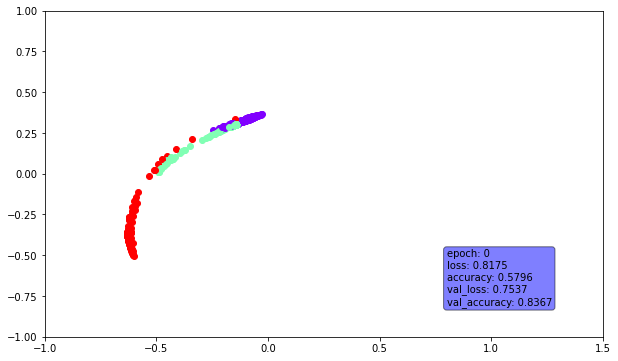

<Figure size 432x288 with 0 Axes>

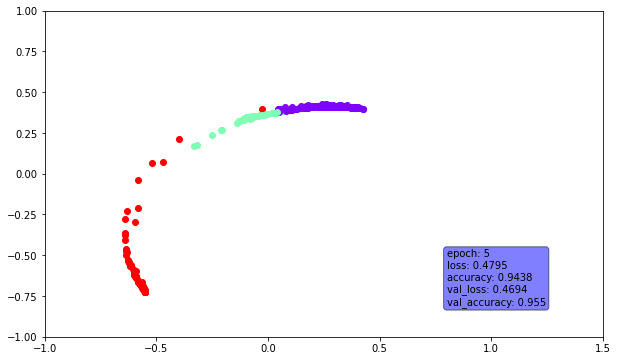

<Figure size 432x288 with 0 Axes>

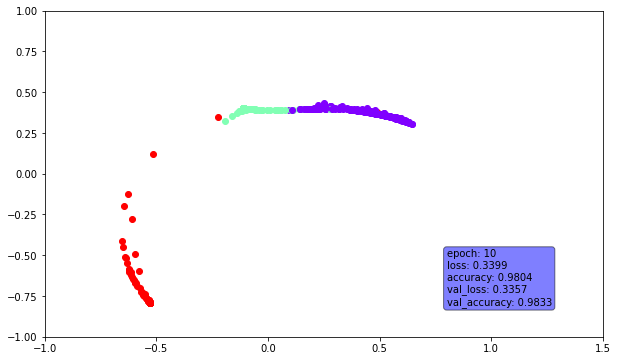

<Figure size 432x288 with 0 Axes>

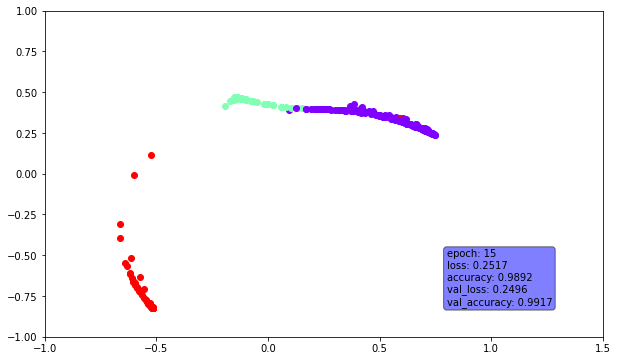

<Figure size 432x288 with 0 Axes>

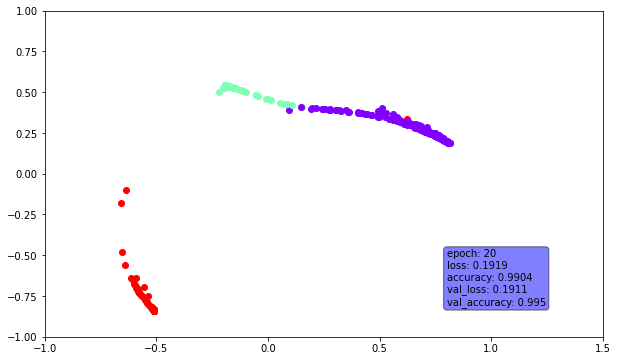

<Figure size 432x288 with 0 Axes>

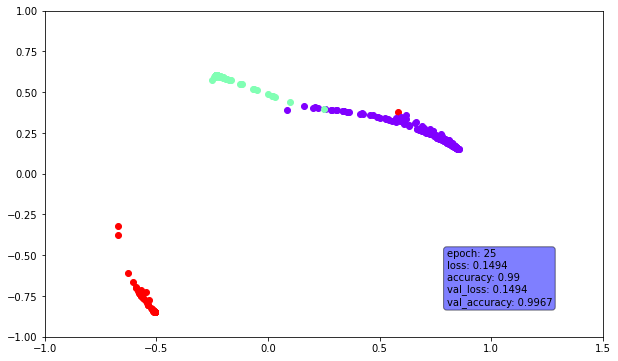

<Figure size 432x288 with 0 Axes>

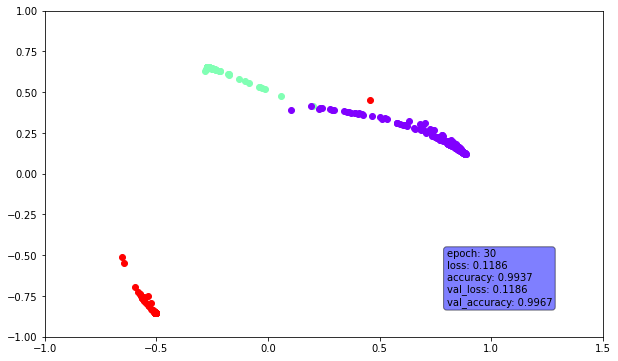

<Figure size 432x288 with 0 Axes>

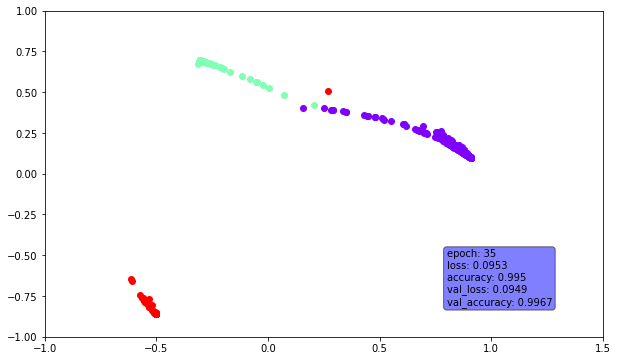

<Figure size 432x288 with 0 Axes>

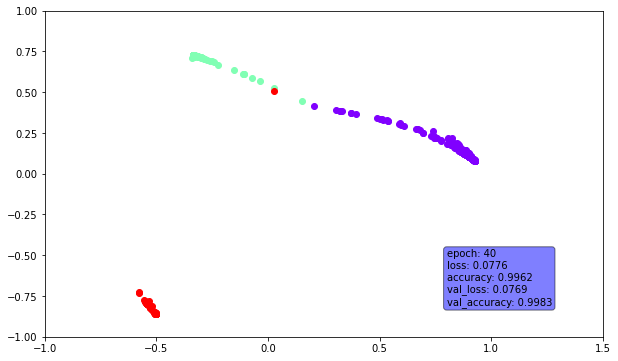

<Figure size 432x288 with 0 Axes>

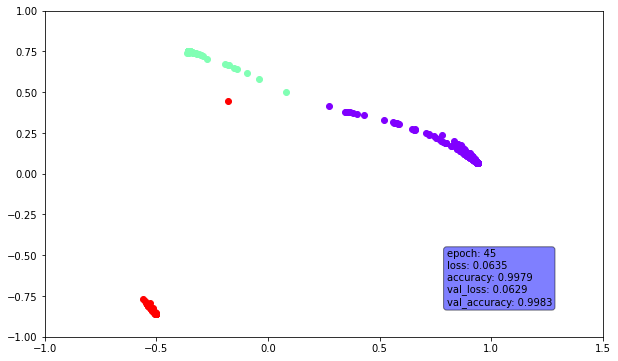

<Figure size 432x288 with 0 Axes>

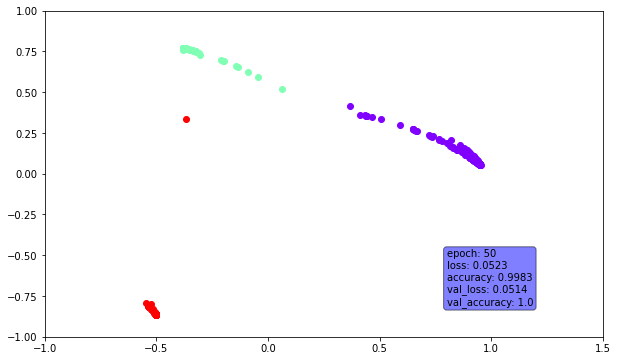

<Figure size 432x288 with 0 Axes>

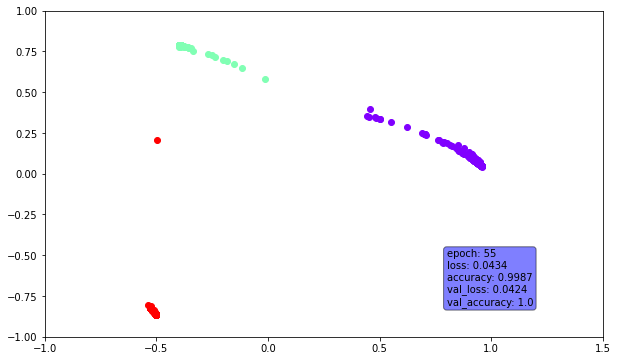

<Figure size 432x288 with 0 Axes>

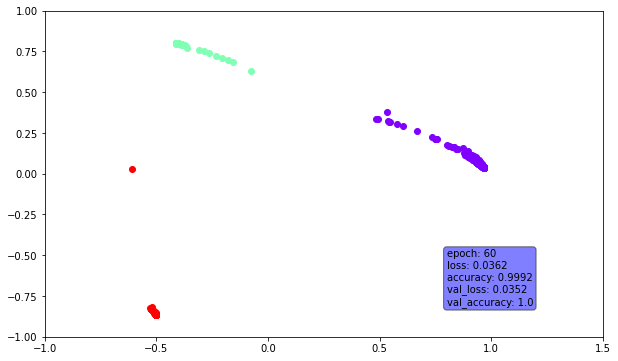

<Figure size 432x288 with 0 Axes>

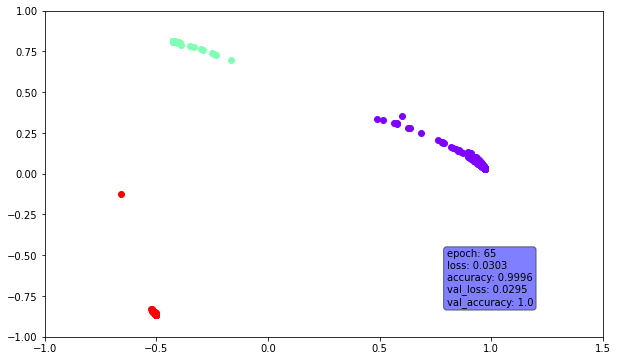

<Figure size 432x288 with 0 Axes>

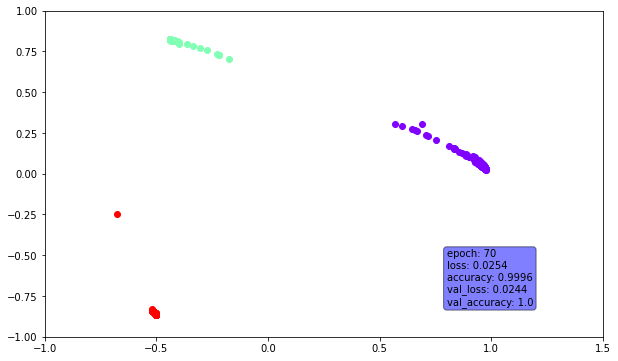

<Figure size 432x288 with 0 Axes>

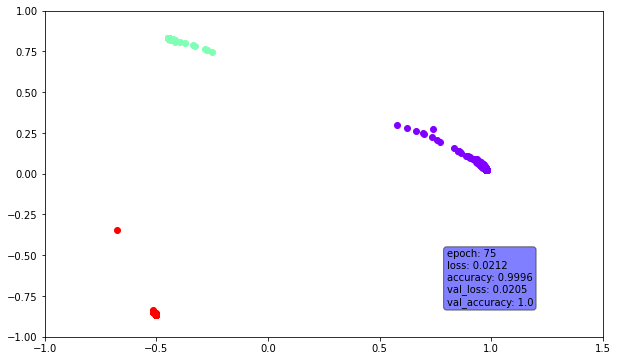

<Figure size 432x288 with 0 Axes>

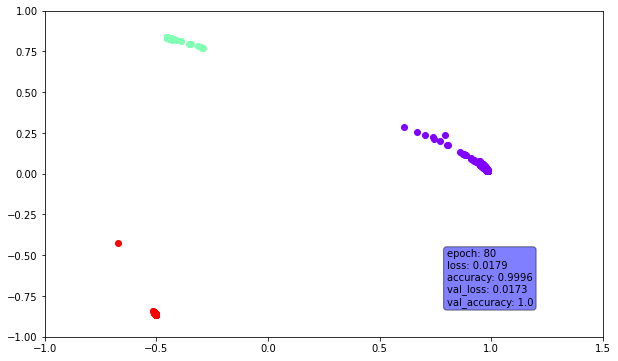

<Figure size 432x288 with 0 Axes>

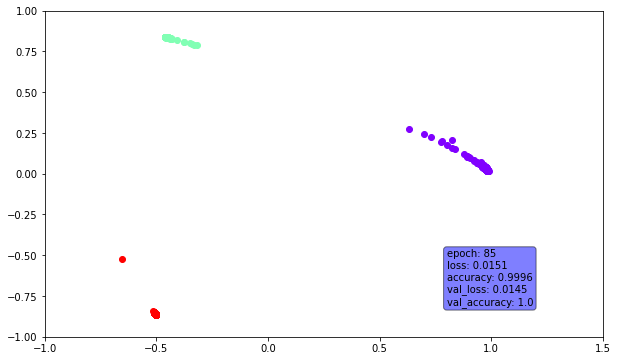

<Figure size 432x288 with 0 Axes>

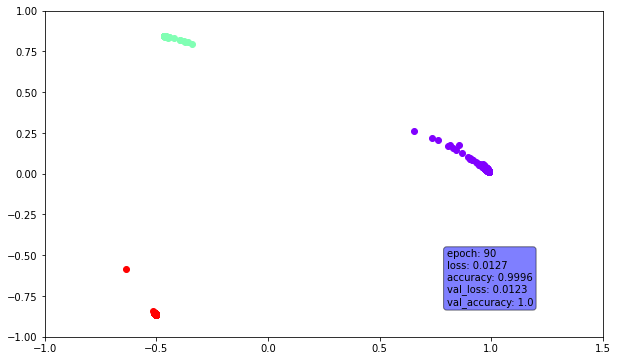

<Figure size 432x288 with 0 Axes>

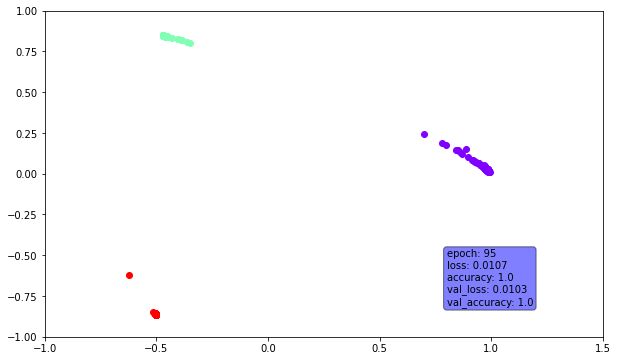

<Figure size 432x288 with 0 Axes>

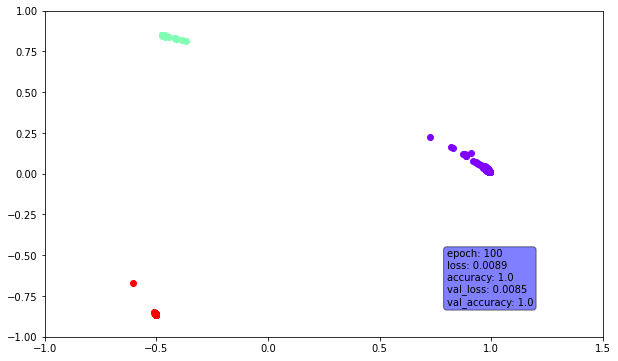

<Figure size 432x288 with 0 Axes>

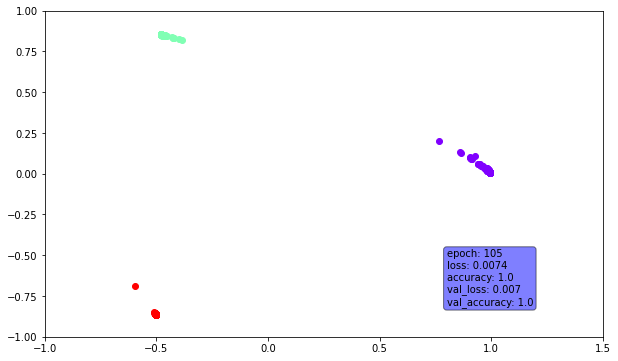

<Figure size 432x288 with 0 Axes>

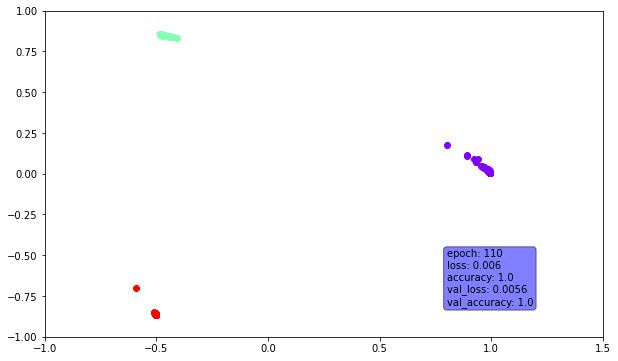

<Figure size 432x288 with 0 Axes>

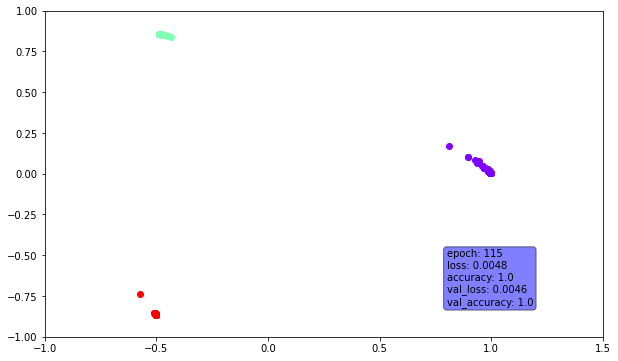

<Figure size 432x288 with 0 Axes>

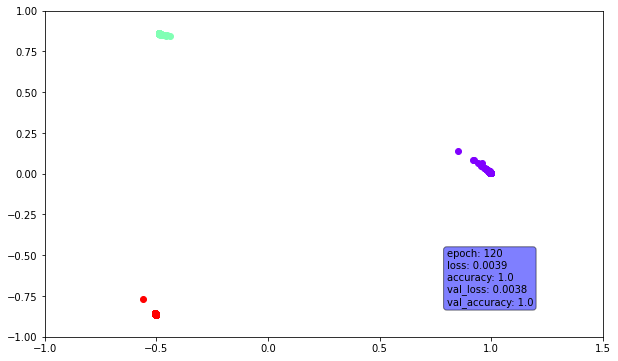

<Figure size 432x288 with 0 Axes>

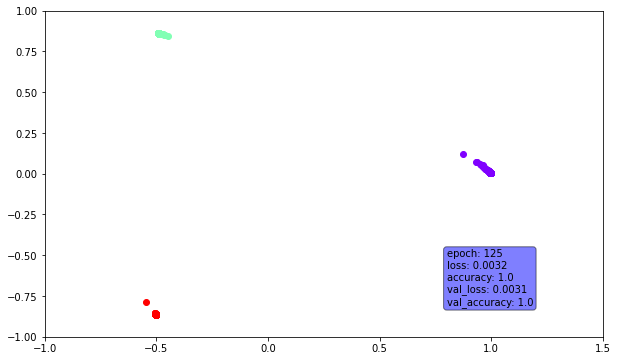

<Figure size 432x288 with 0 Axes>

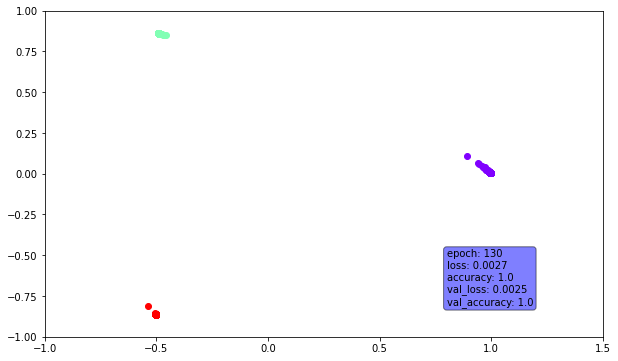

<Figure size 432x288 with 0 Axes>

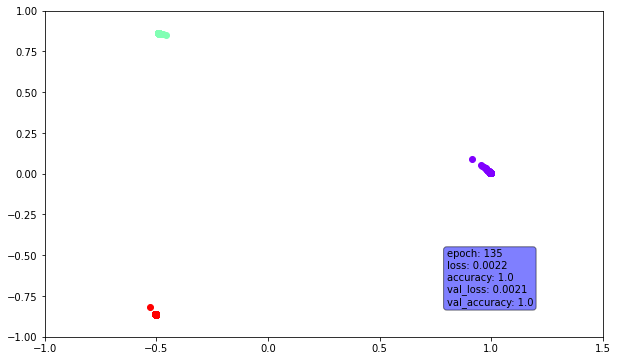

<Figure size 432x288 with 0 Axes>

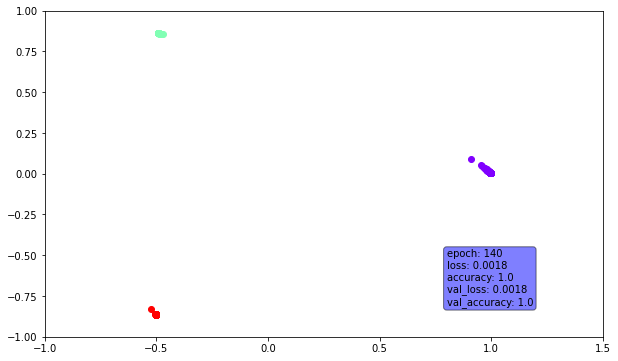

<Figure size 432x288 with 0 Axes>

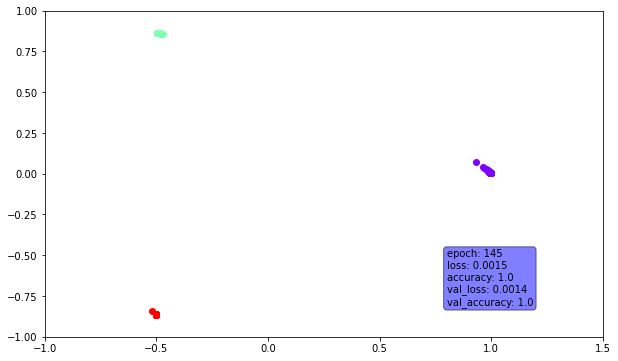

<Figure size 432x288 with 0 Axes>

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(4,)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x, y, epochs=150, validation_split=0.2, verbose=0, callbacks=[CategoricalPlotter(plt, model, x[int(x.shape[0]*0.8):], y[int(x.shape[0]*0.8):], save_fig=True)])

## DOWNLOADING THE IMAGES:

In [5]:
from google.colab import files
import time
for epoch in range(0, 150, 5):
  files.download('epoch_'+str(epoch)+'.png')
  time.sleep(0.1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>